# Parse EWX Ingestion Payload

In [27]:
%matplotlib notebook
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import EWX_forecast as ewx
import pprint
import json
import os

base = os.getcwd()
os.chdir('C:\\Users\wb5888\Documents\EWX')
base = os.getcwd()
pp = pprint.PrettyPrinter(3)

## Show json files, parse ingest

In [28]:
filedf = ewx.sortdir(base, 5)
json_file = filedf.files[0]
json_file

files found in dir:  C:\Users\wb5888\Documents\EWX
                                               files                time
0  20191208202208080000_NEPOOL_BECO_30082430015.json 2019-12-09 08:48:22
1                    NEPOOL_BECO_30082430015_CH3.csv 2019-12-09 08:48:03
2                    NEPOOL_BECO_30082430015_sca.csv 2019-12-09 08:38:45
3               NEPOOL_LPNH_4462057544461265_SCA.csv 2019-12-09 08:34:40
4  20191205164700981000_NEPOOL_LPNH_4462057544461... 2019-12-09 08:14:17


'20191208202208080000_NEPOOL_BECO_30082430015.json'

In [29]:
with open(json_file) as raw:
    print("loading json...")
    data = json.load(raw) #raw json file
    acct = data['account'] #get account data
    idr = acct['timeseriesdataidr'] #dictionary of acct attributes
    sca = acct['timeseriesdatascalar']

pp.pprint(acct)

loading json...
{  'accountnumber': '30082430015',
   'captag': [  {  'lstime': '2019-12-04 14:35:00',
                   'lsuser': 'TESI_INTERFACE',
                   'start': '2019-06-01 00:00:00',
                   'stop': '2020-05-31 23:59:59',
                   'sv': 'H',
                   'v': '257.99100'}],
   'cogenflag': None,
   'discocode': 'BECO',
   'forecastflag': 'Y',
   'lossclass': 'LGSEC',
   'market': 'NEPOOL',
   'meterreadcycle': '03',
   'metertype': 'IDR',
   'netmeterflag': None,
   'premise': {  'address': '140 Cabot St UNKNOWN',
                 'city': 'Needham',
                 'country': 'USA',
                 'county': 'Unknown',
                 'customerid': '1-6YQFZW',
                 'name': 'AMERICAN TOWERS LLC',
                 'state': 'MA',
                 'zip': '02494'},
   'prid': '1-Z61L8I_2',
   'prnumber': '1-Z61L8I',
   'profilebuilder': 'I',
   'profileclass': 'IDR',
   'rateclass': 'T2',
   'ratesubclass': None,
   'rechargeny': N

                                             'v': '5.616'},
                                          {  't': '2019-06-26 09:00:00',
                                             'v': '6.129'},
                                          {  't': '2019-06-26 10:00:00',
                                             'v': '6.453'},
                                          {  't': '2019-06-26 11:00:00',
                                             'v': '6.777'},
                                          {  't': '2019-06-26 12:00:00',
                                             'v': '6.804'},
                                          {  't': '2019-06-26 13:00:00',
                                             'v': '7.182'},
                                          {  't': '2019-06-26 14:00:00',
                                             'v': '7.236'},
                                          {  't': '2019-06-26 15:00:00',
                                             'v': '7.11'},
          

                                          {  't': '2019-07-19 02:00:00',
                                             'v': '21.887999'},
                                          {  't': '2019-07-19 03:00:00',
                                             'v': '21.464999'},
                                          {  't': '2019-07-19 04:00:00',
                                             'v': '21.131999'},
                                          {  't': '2019-07-19 05:00:00',
                                             'v': '21.095999'},
                                          {  't': '2019-07-19 06:00:00',
                                             'v': '21.482999'},
                                          {  't': '2019-07-19 07:00:00',
                                             'v': '21.167999'},
                                          {  't': '2019-07-19 08:00:00',
                                             'v': '22.706999'},
                                         

                                             'v': '39.320998'},
                                          {  't': '2019-08-14 15:00:00',
                                             'v': '42.263998'},
                                          {  't': '2019-08-14 16:00:00',
                                             'v': '39.626998'},
                                          {  't': '2019-08-14 17:00:00',
                                             'v': '39.068998'},
                                          {  't': '2019-08-14 18:00:00',
                                             'v': '37.700998'},
                                          {  't': '2019-08-14 19:00:00',
                                             'v': '35.738998'},
                                          {  't': '2019-08-14 20:00:00',
                                             'v': '34.451998'},
                                          {  't': '2019-08-14 21:00:00',
                                         

                                             'v': '33.587999'},
                                          {  't': '2019-09-08 03:00:00',
                                             'v': '33.21'},
                                          {  't': '2019-09-08 04:00:00',
                                             'v': '32.804999'},
                                          {  't': '2019-09-08 05:00:00',
                                             'v': '31.895999'},
                                          {  't': '2019-09-08 06:00:00',
                                             'v': '31.697999'},
                                          {  't': '2019-09-08 07:00:00',
                                             'v': '32.336998'},
                                          {  't': '2019-09-08 08:00:00',
                                             'v': '35.216999'},
                                          {  't': '2019-09-08 09:00:00',
                                             

                                          {  't': '2019-10-02 20:00:00',
                                             'v': '33.920999'},
                                          {  't': '2019-10-02 21:00:00',
                                             'v': '34.361999'},
                                          {  't': '2019-10-02 22:00:00',
                                             'v': '33.03'},
                                          {  't': '2019-10-02 23:00:00',
                                             'v': '31.391999'},
                                          {  't': '2019-10-03 00:00:00',
                                             'v': '30.896998'},
                                          {  't': '2019-10-03 01:00:00',
                                             'v': '30.6'},
                                          {  't': '2019-10-03 02:00:00',
                                             'v': '30.527999'},
                                          {  't': 

                                             'v': '29.870999'},
                                          {  't': '2019-10-25 06:00:00',
                                             'v': '29.663998'},
                                          {  't': '2019-10-25 07:00:00',
                                             'v': '28.808999'},
                                          {  't': '2019-10-25 08:00:00',
                                             'v': '29.150999'},
                                          {  't': '2019-10-25 09:00:00',
                                             'v': '31.175999'},
                                          {  't': '2019-10-25 10:00:00',
                                             'v': '29.456998'},
                                          {  't': '2019-10-25 11:00:00',
                                             'v': '29.105999'},
                                          {  't': '2019-10-25 12:00:00',
                                         

                                          {  't': '2019-11-13 12:00:00',
                                             'v': '17.288999'},
                                          {  't': '2019-11-13 13:00:00',
                                             'v': '17.1'},
                                          {  't': '2019-11-13 14:00:00',
                                             'v': '17.945999'},
                                          {  't': '2019-11-13 15:00:00',
                                             'v': '19.862999'},
                                          {  't': '2019-11-13 16:00:00',
                                             'v': '21.293999'},
                                          {  't': '2019-11-13 17:00:00',
                                             'v': '22.292999'},
                                          {  't': '2019-11-13 18:00:00',
                                             'v': '21.374999'},
                                          {  '

                                 'stop': '2019-09-04 23:59:59',
                                 'v': 27300},
                              {  'p': {'readtype': 'H', 'totaldemand': 0},
                                 'start': '2019-07-06 00:00:00',
                                 'stop': '2019-08-05 23:59:59',
                                 'v': 20568},
                              {  'p': {'readtype': 'H', 'totaldemand': 0},
                                 'start': '2019-06-15 00:00:00',
                                 'stop': '2019-07-05 23:59:59',
                                 'v': 4404}],
   'totaldemandunittype': 'KW',
   'tpt': [],
   'uidaccount': 1582700,
   'unittype': 'KWH',
   'weatherzone': None,
   'zone': 'NEMA'}


## Scalar

In [30]:
sca = pd.DataFrame(sca)
sca

,start,stop,v,p
0,2019-10-04 00:00:00,2019-11-04 23:59:59,25164,"{'readtype': 'H', 'totaldemand': 0}"
1,2019-09-05 00:00:00,2019-10-03 23:59:59,24324,"{'readtype': 'H', 'totaldemand': 0}"
2,2019-08-06 00:00:00,2019-09-04 23:59:59,27300,"{'readtype': 'H', 'totaldemand': 0}"
3,2019-07-06 00:00:00,2019-08-05 23:59:59,20568,"{'readtype': 'H', 'totaldemand': 0}"
4,2019-06-15 00:00:00,2019-07-05 23:59:59,4404,"{'readtype': 'H', 'totaldemand': 0}"


## Tags

In [31]:
caps = pd.DataFrame.from_records(acct['captag'])
caps

,start,stop,v,sv,lstime,lsuser
0,2019-06-01 00:00:00,2020-05-31 23:59:59,257.99100,H,2019-12-04 14:35:00,TESI_INTERFACE


## Plot ingest IDR

<IPython.core.display.Javascript object>


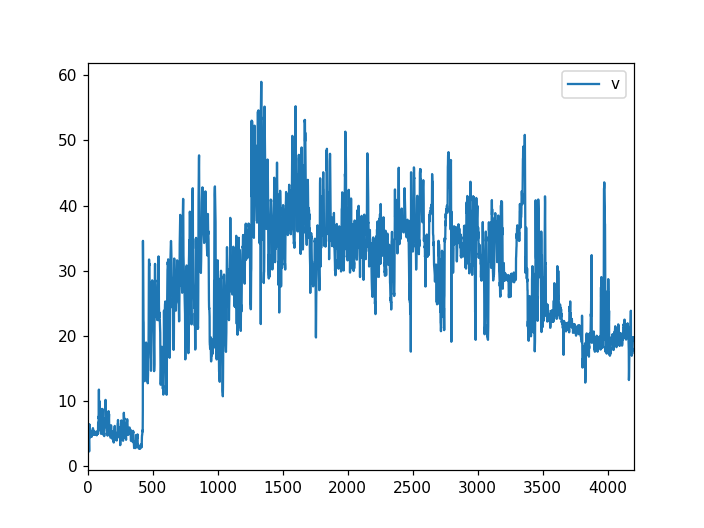

In [32]:
reads = idr[0]['reads']
temp = pd.DataFrame.from_dict(reads)
temp['v'] = pd.to_numeric(temp['v'])
temp.plot(y = 'v')

## Read in adjusted IDR

In [33]:
filedf = ewx.sortdir(base, 5)
csv_file = filedf.files[1]
csv_file

files found in dir:  C:\Users\wb5888\Documents\EWX
                                               files                time
0  20191208202208080000_NEPOOL_BECO_30082430015.json 2019-12-09 08:48:22
1                    NEPOOL_BECO_30082430015_CH3.csv 2019-12-09 08:48:03
2                    NEPOOL_BECO_30082430015_sca.csv 2019-12-09 08:38:45
3               NEPOOL_LPNH_4462057544461265_SCA.csv 2019-12-09 08:34:40
4  20191205164700981000_NEPOOL_LPNH_4462057544461... 2019-12-09 08:14:17


'NEPOOL_BECO_30082430015_CH3.csv'

<IPython.core.display.Javascript object>


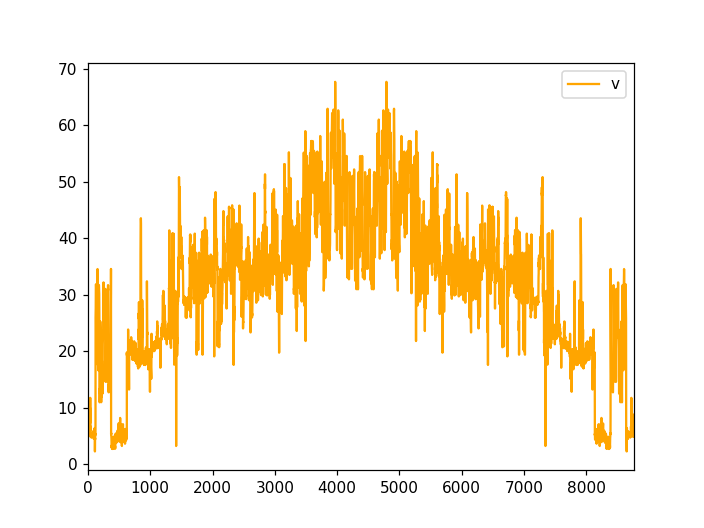

In [34]:
new_idr = pd.read_csv(csv_file)
new_idr.columns = ['t', 'v']
new_idr['t'] = pd.to_datetime(new_idr['t'])
new_idr.plot(y = 'v', color = 'orange')

In [35]:
new_idr['t'] = [str(t) for t in new_idr.t]
new_idr['v'] = [str(v) for v in new_idr.v]
json_df = new_idr.to_json(orient = 'records')
json_df = json.loads(json_df)

## Add IDR to IDR payload

In [10]:
idr[0]['reads'] = json_df

## Add IDR to scalar payload

In [36]:
acct['timeseriesdataidr'] = []
idr.append(dict([('reads', json_df)]))
acct['timeseriesdataidr'] = idr

In [37]:
pp.pprint(acct)

{  'accountnumber': '30082430015',
   'captag': [  {  'lstime': '2019-12-04 14:35:00',
                   'lsuser': 'TESI_INTERFACE',
                   'start': '2019-06-01 00:00:00',
                   'stop': '2020-05-31 23:59:59',
                   'sv': 'H',
                   'v': '257.99100'}],
   'cogenflag': None,
   'discocode': 'BECO',
   'forecastflag': 'Y',
   'lossclass': 'LGSEC',
   'market': 'NEPOOL',
   'meterreadcycle': '03',
   'metertype': 'IDR',
   'netmeterflag': None,
   'premise': {  'address': '140 Cabot St UNKNOWN',
                 'city': 'Needham',
                 'country': 'USA',
                 'county': 'Unknown',
                 'customerid': '1-6YQFZW',
                 'name': 'AMERICAN TOWERS LLC',
                 'state': 'MA',
                 'zip': '02494'},
   'prid': '1-Z61L8I_2',
   'prnumber': '1-Z61L8I',
   'profilebuilder': 'I',
   'profileclass': 'IDR',
   'rateclass': 'T2',
   'ratesubclass': None,
   'rechargeny': None,
   'revisio

                                             'v': '4.815'},
                                          {  't': '2019-06-24 22:00:00',
                                             'v': '4.707'},
                                          {  't': '2019-06-24 23:00:00',
                                             'v': '4.797'},
                                          {  't': '2019-06-25 00:00:00',
                                             'v': '4.527'},
                                          {  't': '2019-06-25 01:00:00',
                                             'v': '4.491'},
                                          {  't': '2019-06-25 02:00:00',
                                             'v': '4.446'},
                                          {  't': '2019-06-25 03:00:00',
                                             'v': '4.644'},
                                          {  't': '2019-06-25 04:00:00',
                                             'v': '4.203'},
         

                                             'v': '32.4'},
                                          {  't': '2019-07-16 11:00:00',
                                             'v': '34.676999'},
                                          {  't': '2019-07-16 12:00:00',
                                             'v': '33.875998'},
                                          {  't': '2019-07-16 13:00:00',
                                             'v': '32.768999'},
                                          {  't': '2019-07-16 14:00:00',
                                             'v': '33.200999'},
                                          {  't': '2019-07-16 15:00:00',
                                             'v': '36.278998'},
                                          {  't': '2019-07-16 16:00:00',
                                             'v': '39.06'},
                                          {  't': '2019-07-16 17:00:00',
                                             'v': 

                                          {  't': '2019-08-06 00:00:00',
                                             'v': '42.002998'},
                                          {  't': '2019-08-06 01:00:00',
                                             'v': '38.79'},
                                          {  't': '2019-08-06 02:00:00',
                                             'v': '36.494998'},
                                          {  't': '2019-08-06 03:00:00',
                                             'v': '35.531998'},
                                          {  't': '2019-08-06 04:00:00',
                                             'v': '35.828998'},
                                          {  't': '2019-08-06 05:00:00',
                                             'v': '35.045998'},
                                          {  't': '2019-08-06 06:00:00',
                                             'v': '38.771998'},
                                          {  

                                          {  't': '2019-08-28 07:00:00',
                                             'v': '38.141998'},
                                          {  't': '2019-08-28 08:00:00',
                                             'v': '35.468999'},
                                          {  't': '2019-08-28 09:00:00',
                                             'v': '40.976998'},
                                          {  't': '2019-08-28 10:00:00',
                                             'v': '44.036998'},
                                          {  't': '2019-08-28 11:00:00',
                                             'v': '45.107998'},
                                          {  't': '2019-08-28 12:00:00',
                                             'v': '42.605998'},
                                          {  't': '2019-08-28 13:00:00',
                                             'v': '42.470998'},
                                         

                                          {  't': '2019-09-20 00:00:00',
                                             'v': '29.555999'},
                                          {  't': '2019-09-20 01:00:00',
                                             'v': '28.286999'},
                                          {  't': '2019-09-20 02:00:00',
                                             'v': '28.133999'},
                                          {  't': '2019-09-20 03:00:00',
                                             'v': '26.342999'},
                                          {  't': '2019-09-20 04:00:00',
                                             'v': '26.603999'},
                                          {  't': '2019-09-20 05:00:00',
                                             'v': '26.126999'},
                                          {  't': '2019-09-20 06:00:00',
                                             'v': '26.810999'},
                                         

                                          {  't': '2019-10-13 14:00:00',
                                             'v': '40.553998'},
                                          {  't': '2019-10-13 15:00:00',
                                             'v': '41.300998'},
                                          {  't': '2019-10-13 16:00:00',
                                             'v': '41.471998'},
                                          {  't': '2019-10-13 17:00:00',
                                             'v': '41.156998'},
                                          {  't': '2019-10-13 18:00:00',
                                             'v': '41.084999'},
                                          {  't': '2019-10-13 19:00:00',
                                             'v': '39.815998'},
                                          {  't': '2019-10-13 20:00:00',
                                             'v': '37.592998'},
                                         

                                          {  't': '2019-11-04 11:00:00',
                                             'v': '24.407999'},
                                          {  't': '2019-11-04 12:00:00',
                                             'v': '27.287999'},
                                          {  't': '2019-11-04 13:00:00',
                                             'v': '32.417999'},
                                          {  't': '2019-11-04 14:00:00',
                                             'v': '40.814998'},
                                          {  't': '2019-11-04 15:00:00',
                                             'v': '34.316998'},
                                          {  't': '2019-11-04 16:00:00',
                                             'v': '32.156999'},
                                          {  't': '2019-11-04 17:00:00',
                                             'v': '31.841998'},
                                         

                                             'v': '19.484999'},
                                          {  't': '2019-11-27 05:00:00',
                                             'v': '18.63'},
                                          {  't': '2019-11-27 06:00:00',
                                             'v': '20.07'},
                                          {  't': '2019-11-27 07:00:00',
                                             'v': '18.431999'},
                                          {  't': '2019-11-27 08:00:00',
                                             'v': '18.710999'},
                                          {  't': '2019-11-27 09:00:00',
                                             'v': '17.288999'},
                                          {  't': '2019-11-27 10:00:00',
                                             'v': '21.392999'},
                                          {  't': '2019-11-27 11:00:00',
                                             'v':

                                          {  't': '2018-01-03 05:00:00',
                                             'v': '4.761'},
                                          {  't': '2018-01-03 06:00:00',
                                             'v': '4.833'},
                                          {  't': '2018-01-03 07:00:00',
                                             'v': '5.04'},
                                          {  't': '2018-01-03 08:00:00',
                                             'v': '4.824'},
                                          {  't': '2018-01-03 09:00:00',
                                             'v': '4.833'},
                                          {  't': '2018-01-03 10:00:00',
                                             'v': '5.04'},
                                          {  't': '2018-01-03 11:00:00',
                                             'v': '4.842'},
                                          {  't': '2018-01-03 12:00:00'

                                             'v': '4.32'},
                                          {  't': '2018-01-26 06:00:00',
                                             'v': '4.374'},
                                          {  't': '2018-01-26 07:00:00',
                                             'v': '4.428'},
                                          {  't': '2018-01-26 08:00:00',
                                             'v': '5.327999999999999'},
                                          {  't': '2018-01-26 09:00:00',
                                             'v': '5.0760000000000005'},
                                          {  't': '2018-01-26 10:00:00',
                                             'v': '5.093999999999999'},
                                          {  't': '2018-01-26 11:00:00',
                                             'v': '5.372999999999999'},
                                          {  't': '2018-01-26 12:00:00',
                     

                                          {  't': '2018-02-24 14:00:00',
                                             'v': '26.558998'},
                                          {  't': '2018-02-24 15:00:00',
                                             'v': '26.981999'},
                                          {  't': '2018-02-24 16:00:00',
                                             'v': '24.047999'},
                                          {  't': '2018-02-24 17:00:00',
                                             'v': '25.415999'},
                                          {  't': '2018-02-24 18:00:00',
                                             'v': '25.631999'},
                                          {  't': '2018-02-24 19:00:00',
                                             'v': '22.346999'},
                                          {  't': '2018-02-24 20:00:00',
                                             'v': '24.047998'},
                                         

                                          {  't': '2018-03-20 06:00:00',
                                             'v': '42.290997999999995'},
                                          {  't': '2018-03-20 07:00:00',
                                             'v': '43.658998'},
                                          {  't': '2018-03-20 08:00:00',
                                             'v': '42.974998'},
                                          {  't': '2018-03-20 09:00:00',
                                             'v': '42.434999'},
                                          {  't': '2018-03-20 10:00:00',
                                             'v': '40.715998'},
                                          {  't': '2018-03-20 11:00:00',
                                             'v': '40.868999'},
                                          {  't': '2018-03-20 12:00:00',
                                             'v': '39.24'},
                                    

                                          {  't': '2018-04-09 21:00:00',
                                             'v': '36.044999'},
                                          {  't': '2018-04-09 22:00:00',
                                             'v': '35.711998'},
                                          {  't': '2018-04-09 23:00:00',
                                             'v': '35.603998'},
                                          {  't': '2018-04-10 00:00:00',
                                             'v': '36.080999'},
                                          {  't': '2018-04-10 01:00:00',
                                             'v': '37.304998'},
                                          {  't': '2018-04-10 02:00:00',
                                             'v': '37.115999'},
                                          {  't': '2018-04-10 03:00:00',
                                             'v': '37.133998'},
                                         

                                             'v': '30.96'},
                                          {  't': '2018-04-30 22:00:00',
                                             'v': '31.328999'},
                                          {  't': '2018-04-30 23:00:00',
                                             'v': '31.346998'},
                                          {  't': '2018-05-01 00:00:00',
                                             'v': '32.255998'},
                                          {  't': '2018-05-01 01:00:00',
                                             'v': '34.136998999999996'},
                                          {  't': '2018-05-01 02:00:00',
                                             'v': '31.895998'},
                                          {  't': '2018-05-01 03:00:00',
                                             'v': '33.614999'},
                                          {  't': '2018-05-01 04:00:00',
                                    

                                             'v': '37.232997999999995'},
                                          {  't': '2018-05-23 03:00:00',
                                             'v': '38.222998'},
                                          {  't': '2018-05-23 04:00:00',
                                             'v': '39.06'},
                                          {  't': '2018-05-23 05:00:00',
                                             'v': '39.42'},
                                          {  't': '2018-05-23 06:00:00',
                                             'v': '40.625997999999996'},
                                          {  't': '2018-05-23 07:00:00',
                                             'v': '40.706998'},
                                          {  't': '2018-05-23 08:00:00',
                                             'v': '40.922998'},
                                          {  't': '2018-05-23 09:00:00',
                               

                                             'v': '31.303998999999997'},
                                          {  't': '2018-06-07 19:00:00',
                                             'v': '31.358'},
                                          {  't': '2018-06-07 20:00:00',
                                             'v': '31.745'},
                                          {  't': '2018-06-07 21:00:00',
                                             'v': '34.948999'},
                                          {  't': '2018-06-07 22:00:00',
                                             'v': '37.297999'},
                                          {  't': '2018-06-07 23:00:00',
                                             'v': '37.450998999999996'},
                                          {  't': '2018-06-08 00:00:00',
                                             'v': '39.034999'},
                                          {  't': '2018-06-08 01:00:00',
                             

                                          {  't': '2018-06-30 12:00:00',
                                             'v': '33.193999'},
                                          {  't': '2018-06-30 13:00:00',
                                             'v': '32.528'},
                                          {  't': '2018-06-30 14:00:00',
                                             'v': '30.98'},
                                          {  't': '2018-06-30 15:00:00',
                                             'v': '31.375999999999998'},
                                          {  't': '2018-06-30 16:00:00',
                                             'v': '35.101999'},
                                          {  't': '2018-06-30 17:00:00',
                                             'v': '43.291999'},
                                          {  't': '2018-06-30 18:00:00',
                                             'v': '44.578998999999996'},
                              

                                             'v': '37.243999'},
                                          {  't': '2018-07-24 00:00:00',
                                             'v': '38.080999'},
                                          {  't': '2018-07-24 01:00:00',
                                             'v': '38.368999'},
                                          {  't': '2018-07-24 02:00:00',
                                             'v': '39.340999'},
                                          {  't': '2018-07-24 03:00:00',
                                             'v': '38.818999'},
                                          {  't': '2018-07-24 04:00:00',
                                             'v': '38.998999'},
                                          {  't': '2018-07-24 05:00:00',
                                             'v': '38.692999'},
                                          {  't': '2018-07-24 06:00:00',
                                         

                                          {  't': '2018-08-18 02:00:00',
                                             'v': '36.09'},
                                          {  't': '2018-08-18 03:00:00',
                                             'v': '36.575998'},
                                          {  't': '2018-08-18 04:00:00',
                                             'v': '37.08'},
                                          {  't': '2018-08-18 05:00:00',
                                             'v': '36.99'},
                                          {  't': '2018-08-18 06:00:00',
                                             'v': '38.7'},
                                          {  't': '2018-08-18 07:00:00',
                                             'v': '39.806999'},
                                          {  't': '2018-08-18 08:00:00',
                                             'v': '40.95'},
                                          {  't': '2018-08-18 

                                          {  't': '2018-09-10 11:00:00',
                                             'v': '30.941997999999998'},
                                          {  't': '2018-09-10 12:00:00',
                                             'v': '38.393997999999996'},
                                          {  't': '2018-09-10 13:00:00',
                                             'v': '35.414999'},
                                          {  't': '2018-09-10 14:00:00',
                                             'v': '37.988997999999995'},
                                          {  't': '2018-09-10 15:00:00',
                                             'v': '38.61'},
                                          {  't': '2018-09-10 16:00:00',
                                             'v': '35.090998'},
                                          {  't': '2018-09-10 17:00:00',
                                             'v': '33.281999'},
                  

                                          {  't': '2018-10-06 23:00:00',
                                             'v': '39.491997999999995'},
                                          {  't': '2018-10-07 00:00:00',
                                             'v': '39.42'},
                                          {  't': '2018-10-07 01:00:00',
                                             'v': '39.356999'},
                                          {  't': '2018-10-07 02:00:00',
                                             'v': '39.068998'},
                                          {  't': '2018-10-07 03:00:00',
                                             'v': '39.995998'},
                                          {  't': '2018-10-07 04:00:00',
                                             'v': '39.356998'},
                                          {  't': '2018-10-07 05:00:00',
                                             'v': '39.095998'},
                                    

                                             'v': '21.275999'},
                                          {  't': '2018-11-02 12:00:00',
                                             'v': '23.85'},
                                          {  't': '2018-11-02 13:00:00',
                                             'v': '25.604999'},
                                          {  't': '2018-11-02 14:00:00',
                                             'v': '24.515999'},
                                          {  't': '2018-11-02 15:00:00',
                                             'v': '25.901999'},
                                          {  't': '2018-11-02 16:00:00',
                                             'v': '26.117998999999998'},
                                          {  't': '2018-11-02 17:00:00',
                                             'v': '24.902998999999998'},
                                          {  't': '2018-11-02 18:00:00',
                           

                                          {  't': '2018-11-25 05:00:00',
                                             'v': '19.268998999999997'},
                                          {  't': '2018-11-25 06:00:00',
                                             'v': '19.808999'},
                                          {  't': '2018-11-25 07:00:00',
                                             'v': '18.980999'},
                                          {  't': '2018-11-25 08:00:00',
                                             'v': '18.314999'},
                                          {  't': '2018-11-25 09:00:00',
                                             'v': '19.016999'},
                                          {  't': '2018-11-25 10:00:00',
                                             'v': '17.91'},
                                          {  't': '2018-11-25 11:00:00',
                                             'v': '23.04'},
                                        

                                             'v': '30.905998999999998'},
                                          {  't': '2018-12-24 15:00:00',
                                             'v': '31.418999'},
                                          {  't': '2018-12-24 16:00:00',
                                             'v': '31.751998999999998'},
                                          {  't': '2018-12-24 17:00:00',
                                             'v': '31.535999'},
                                          {  't': '2018-12-24 18:00:00',
                                             'v': '30.33'},
                                          {  't': '2018-12-24 19:00:00',
                                             'v': '27.773999'},
                                          {  't': '2018-12-24 20:00:00',
                                             'v': '26.072999'},
                                          {  't': '2018-12-24 21:00:00',
                           

## Write modified .json file

In [38]:
json_file

'20191208202208080000_NEPOOL_BECO_30082430015.json'

In [39]:
fp = os.path.join(base, json_file)
final_json = json.dumps(data)

with open(json_file, 'w') as f:
    f.write(final_json)